Crear imagen de los dipolos electricos y ver lineas de campo de las mismas

Lo primero que vamos a hacer es enteder las herramientas que vamos a ocupar para crear este codigo:
lo primero son los paquete estos paquetes son modulos o herramientas que podemos usar, estas herramientas nos sirven para resolver diferentes cosas pueden ser herramientas para animar, para calculos matematicos, para poder exportar archivos e infinidad de cosas mas.

Ahora los paquetes que vamos a ocupar son Numpy y Matplotlib, estos paquetes nos sirven para poder usar funciones matematicas y para poder graficar datos

las funciones que vamos a ocupar de cada una son

## **Numpy**

### array:
    - es una funcion que se encarga de poner transformar una lista en un arreglo de numpy el cual se comporta como una matriz y asi pode organizar y aplicar operaciones conjuntas. 

In [13]:
import numpy as np

a=np.array([[0,3,4,5],[1,2,3,4]])
print("arreglo 3x2")
print(a)
b=np.array([5,3])
print("arreglo 2x1")
print(b)
print("Operaciones de matrices axb")
print(b@a)

arreglo 3x2
[[0 3 4 5]
 [1 2 3 4]]
arreglo 2x1
[5 3]
Operaciones de matrices axb
[ 3 21 29 37]


### Linspace

- nos permite crear una cantidad determinada de numeros entre una rango que lo demarcamos.

In [34]:
a=np.linspace(1,2,10)
print("10 objetos entre 1 y 2 igualmente espaciados")
print(a)
print("_____________")
print("por defecto la cantidad de numeros que linspace crea es 50")
b=np.linspace(1,50)
print(b)

10 objetos entre 1 y 2 igualmente espaciados
[1.         1.11111111 1.22222222 1.33333333 1.44444444 1.55555556
 1.66666667 1.77777778 1.88888889 2.        ]
_____________
por defecto la cantidad de numeros que linspace crea es 50
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]


## Meshgrid

- es una manera de crear un par de datos que se referencien entre si, de manera que cada uno de los puntos que se encuentren en x se dibujen o relacionen con los puntos en y. (me falta mas información porque no entiendo tanto como funciona)

[0. 1.] [0.  0.5 1. ]
[[0. 1.]
 [0. 1.]
 [0. 1.]]
[[0.  0. ]
 [0.5 0.5]
 [1.  1. ]]


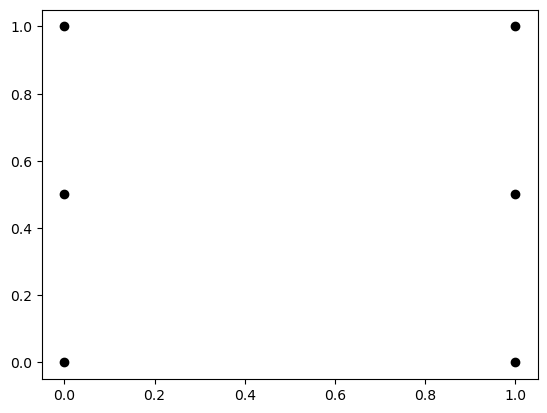

In [41]:
nx, ny = (2, 3)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
print(x,y)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)
import matplotlib.pyplot as plt
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

# Escribiendo el codigo

A continuacion tenemos un codigo de ChatGTP que nos permite tener un primer paso de como empezar este trabajo, desafortunadamente o afortunadamente el codigo no funciona para observar las lineas del campo, pero estudiemoslo para ver porque no lo hace, que es lo que hace y si se puede arreglar.

In [53]:
import numpy as np
import matplotlib.pyplot as plt

def electric_field_due_to_point_charge(q, r0, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a una carga puntual."""
    k = 8.9875517923 * 10**9  # Constante de Coulomb en Nm^2/C^2
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2)
    # Evitar la singularidad en r=0
    if r < 1e-10:
        return np.array([0.0, 0.0])
    else:
        return k * q * (np.array([x, y]) - np.array(r0)) / r**3

def electric_field_of_dipole(q, d, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a un dipolo eléctrico."""
    # Posición de las cargas
    r_positive = np.array([d/2, 0])
    r_negative = -r_positive
    # Campo eléctrico debido a cada carga
    E_positive = electric_field_due_to_point_charge(q, r_positive, x, y)
    E_negative = electric_field_due_to_point_charge(-q, r_negative, x, y)
    # Campo eléctrico total
    return E_positive + E_negative

# Definir el rango de valores para x y y
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calcular el campo eléctrico en cada punto de la malla
Ex, Ey = electric_field_of_dipole(1, 1, X, Y)

# Graficar las líneas de campo eléctrico
plt.streamplot(X, Y, Ex, Ey, density=2, linewidth=1, arrowsize=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Líneas de campo eléctrico de un dipolo eléctrico')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Lo primero que vamos a hacer es explicar parte por parte y ver si la cadena logica usada esta bien y arreglar los errores que encontramos en el camino. Lo primero que notamos es que usa los paquetes matplotlib y numpy, lo cual suele ser lo mas comun para este tipo de trabajos.

Seguido de esto define dos funciones la cual en teoria deberia servir para calcular el campo electrico de una particula puntual y la siguiente funcion nos permite calcular el campo electrico del dipolo. Entonces lo primero que vamos a ver es si estas funciones compilan y despues si funcionan.

In [96]:
def electric_field_due_to_point_charge(q, r0, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a una carga puntual."""
    k = 8.9875517923 * 10**9  # Constante de Coulomb en Nm^2/C^2
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2)
    # Evitar la singularidad en r=0
    if r < 1e-10:
        return np.array([0.0, 0.0])
    else:
        return k * q * (np.array([x, y]) - np.array(r0)) / r**3
    
print(electric_field_due_to_point_charge(10,[2,0],0,0))

[-2.24688795e+10  0.00000000e+00]


el codigo compila exitosamente, ahora entedamos poco a poco que es lo que esta haciendo, la funcion tiene como objetivo calcular el campo en cada punto que nosotros le ingresemos.

Para ello le ingresamos el valor de nuestra carga "q", la posicion de nuestra carga "r0" y las dos coordenadas del punto donde queremos saber el campo "x" e "y".

luego de esto en nuestra funcion vamos a ingresar la constante de coulomb "k" la cual nos va a permintir realizar nuestros calculos mas adelante.

Continuamos definiendo la distancia entre nuestro carga con respecto a la carga de prueba a traves de la variable "r", para ello dado que estamos trabajando con vectores debido a las dos cordenadas "x" e "y"(ojala proximamente "z") calculamos a traves del teorema de pitagoras.

Adicionalmente debemos entender que debido a como la formula de campo electrico (1) se encuentra definida debemos tomar en cuenta que existe una singularidad en 0, por lo que para evitarlo tenemos un condicional para una distancia menor $1*10^{-10}$
$$
\vec{E}=k*\frac{q*(r_2-r_1)}{r^3} \tag{1}
$$

Entonces en la teoria y la practica pareciera que esta funcionando el código.

In [51]:
def electric_field_of_dipole(q, d, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a un dipolo eléctrico."""
    # Posición de las cargas
    r_positive = np.array([d/2, 0])
    r_negative = -r_positive
    # Campo eléctrico debido a cada carga
    E_positive = electric_field_due_to_point_charge(q, r_positive, x, y)
    E_negative = electric_field_due_to_point_charge(-q, r_negative, x, y)
    # Campo eléctrico total
    return E_positive + E_negative

a=electric_field_of_dipole(10.,2.,0.,0.)
print(a)

[-1.79751036e+11  0.00000000e+00]


Ahora lo que tenemos aqui es la segunda parte logica de nuestro proyecto que es juntar dos cargas puntuales de manera que pueda formar un dipolo eléctrico pero esto implica que ambos campo electricos van a afectar el espacio, asi que el campo total va a ser una suma de los dos en un mismo punto.

Por lo que la siguiente función realiza la accion de combinar este dipolo, al preguntarnos la carga "q", la distancia entre las cargas "d", la posicion de la carga de prueba "x" e "y".

Lo que hace ahora es poner el punto de referencia en la mitad de las cargas, de manera que quedan dos distancias las cuales llama "r_positive" y "r_negative", seguidamente usa la funcion electric_field_to_point_charge la cual llamaremos "eftpc" con el fin de encontrar cual es el comportamiento de un campo electrico positivo al lado positivo del plan y un campo negativo al lado negativo del plano en el punto [x,y], regresando asi la suma de ambos campos.

forma y cantidar de datos de X: (100, 100) 10000
forma y cantidar de datos de Y: (100, 100) 10000


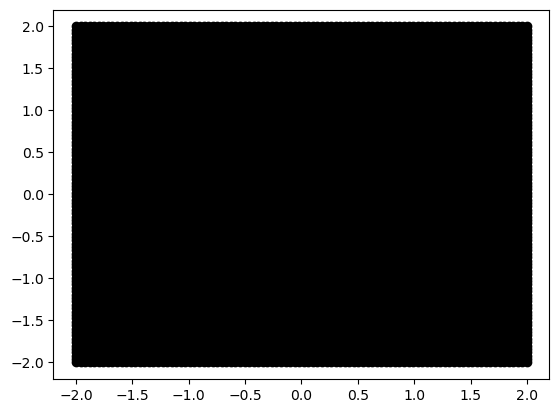

In [127]:
# Definir el rango de valores para x y y
x_values = np.linspace(-2, 2, 100)
y_values = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x_values, y_values)
plt.plot(X, Y, marker='o', color='k', linestyle='none')
print("forma y cantidar de datos de X:",X.shape,X.size)
print("forma y cantidar de datos de Y:",Y.shape,Y.size)

Entonces teniendo teoricamente los codigos para generar un dipolo magentico, debemos generar una cantidad de "cargas de prueba" con las cuales ir dibujando el dipolo magnetico.b

In [68]:
# Calcular el campo eléctrico en cada punto de la malla
Ex, Ey = electric_field_of_dipole(1, 1, X, Y)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

En este punto es cuando tenemos nuestro primer error del codigo ya que no compila. La informacion qe nos da es que la informacion del if no es concreta ya que r, no es un 'int' si no que es un array por lo que no tiene un unico valor y para poder solucionar este problema nos pide aplicar una operacion lógica acorde. 

Esta operación lógica son a.any o a.all y se refiere a que de "a" no hay ninguno 'any' que cumpla con el requisito o caso contrario de "a" todos cumplan 'all" esta condicion.

In [119]:
def electric_field_due_to_point_charge(q, r0, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a una carga puntual."""
    k = 8.9875517923 * 10**9  # Constante de Coulomb en Nm^2/C^2
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2)
    # Evitar la singularidad en r=0
    if np.any(r<1e-3):
        return np.array([0.0, 0.0])
    else:
        return k * q * (np.array([x, y]) - np.array(r0)) / r**3

# Calcular el campo eléctrico en cada punto de la malla
Ex, Ey = electric_field_of_dipole(1,1, X, Y)

podemos observar que el problema de la singularidad fue solucionado pero ahora se presenta un nuevo problema que es que en el momento que usamos la funcion meshgrid creamos un arreglo grande [10,10] con "X" e "Y", pero al momento de realizar el calculo del campo en el punto, solo es un arreglo de [x,y] asi que no se puede operar correctamente.

Asi que se me ocurre aumentar la cantidad de "r0" a traves de un linspace y posteriormente un merge, aplicando la misma logica que se uso para crear "X","Y".

Debemos notar que el problema no yace en "elfdtpc" si no en la segunda funcion de combinar los campos y esto es devido a que "r_positive" y "r_negative" no tienen la misma dimension de "X" e "Y".

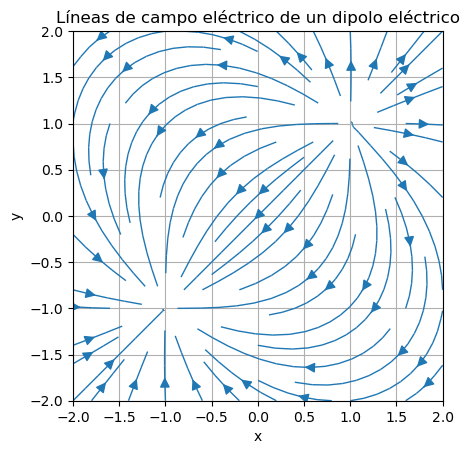

In [154]:
def electric_field_of_dipole(q, d, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a un dipolo eléctrico."""
    # Posición de las cargas
    r_positive = d*np.ones(X.shape)
    r_negative = -r_positive
    # Campo eléctrico debido a cada carga
    E_positive = electric_field_due_to_point_charge(q, r_positive, x, y)
    E_negative = electric_field_due_to_point_charge(-q, r_negative, x, y)
    # Campo eléctrico total
    return E_positive + E_negative

# Calcular el campo eléctrico en cada punto de la malla
Ex, Ey = electric_field_of_dipole(1,1, X, Y)
# Graficar las líneas de campo eléctrico
plt.streamplot(X, Y, Ex, Ey, density=0.7, linewidth=1, arrowsize=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid("True")
plt.title('Líneas de campo eléctrico de un dipolo eléctrico')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Vemos que el codigo es funcional, pero hasta cierto punto porque lo que sucede ahora es que la distancia entre las cargas no es necesariamente la que nosotros ingresamos, esto debido a que nuestro campo tiene una distribucion vertical.

Entonces para corregir este error lo que vamos a hacer es usar trigonometria, ya que si consideramos el vector posicion de la carga como la distancia, podemos dividirlo en componentes.

Para hacerlo sensillo voy a considerar que la norma de los vectores x e y son la misma por lo que basta con usar $sen(\pi/2)= ady/hip$ y despejar

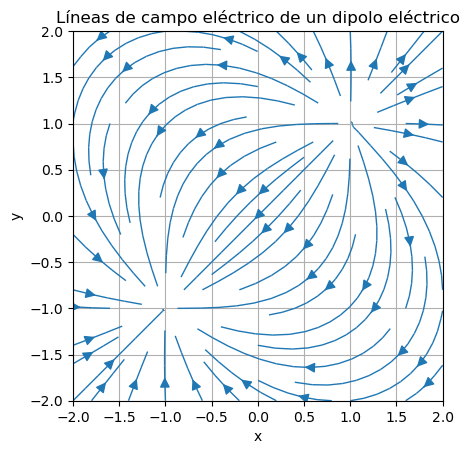

In [162]:
def electric_field_of_dipole(q, d, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a un dipolo eléctrico."""
    # Distancia entre cargas
    distancia=np.sqrt(2)*d/2
    # Posición de las cargas
    r_positive = d*np.ones(X.shape)
    r_negative = -r_positive
    # Campo eléctrico debido a cada carga
    E_positive = electric_field_due_to_point_charge(q, r_positive, x, y)
    E_negative = electric_field_due_to_point_charge(-q, r_negative, x, y)
    # Campo eléctrico total
    return E_positive + E_negative

# Calcular el campo eléctrico en cada punto de la malla
Ex, Ey = electric_field_of_dipole(1,1, X, Y)
# Graficar las líneas de campo eléctrico
plt.streamplot(X, Y, Ex, Ey, density=0.7, linewidth=1, arrowsize=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid("True")
plt.title('Líneas de campo eléctrico de un dipolo eléctrico')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

De esta manera tenemos nuestro dipolo de igual cargas, ahora para tener diferentes cargas debemos ingresar tranquila mente una nueva variable y no abria ningun problema.

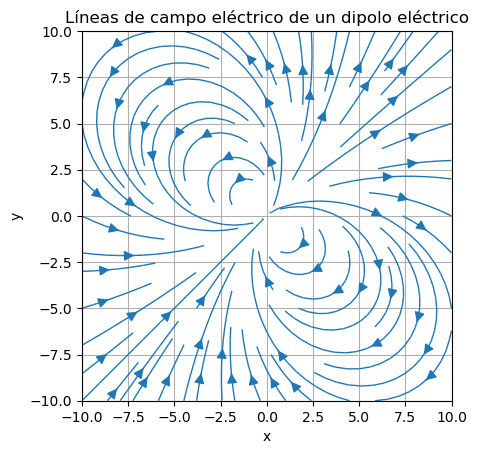

In [244]:
def electric_field_due_to_point_charge(q, r0, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a una carga puntual."""
    k = 8.9875517923 * 10**9  # Constante de Coulomb en Nm^2/C^2
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2)
    # Evitar la singularidad en r=0
    if np.any(r<1e-3):
        return np.array([0.0, 0.0])
    else:
        return k * q * (np.array([x, y]) - np.array(r0)) / r**3

def electric_field_of_dipole(q, d, x, y):
    """Calcula el campo eléctrico en un punto (x, y) debido a un dipolo eléctrico."""
    # Distancia entre cargas
    distancia=np.sin(np.pi/2)*d/4
    # Posición de las cargas
    r_positive = distancia*np.ones(x.shape)
    r_negative = -r_positive
    # Campo eléctrico debido a cada carga
    E_positive = electric_field_due_to_point_charge(q[0], r_positive, x, y)
    E_negative = electric_field_due_to_point_charge(-q[1], r_negative, x, y)
    # Campo eléctrico total
    return E_positive + E_negative

# Definir el rango de valores para x y y
x_values = np.linspace(-10, 10, 100)
y_values = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calcular el campo eléctrico en cada punto de la malla
Ex, Ey = electric_field_of_dipole([1,1],1, X, Y)
# Graficar las líneas de campo eléctrico
plt.streamplot(X, Y, Ex, Ey, density=[1,0.7], linewidth=1, arrowsize=1.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid("True")
plt.title('Líneas de campo eléctrico de un dipolo eléctrico')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Finalmente tenemos un codigo el cual nos permite ingresar los valores de q, distancia entre cargas y nos dibuja las lineas de campo.

Ahora intentare hacer esto a escala 3 dimensional

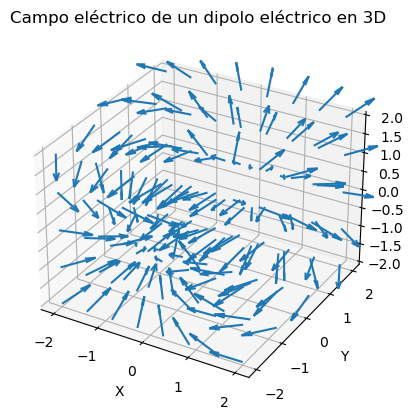

In [306]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def electric_field_due_to_point_charge3(q, r0, x, y, z):
    """Calcula el campo eléctrico en un punto (x, y) debido a una carga puntual."""
    k = 8.9875517923 * 10**9  # Constante de Coulomb en Nm^2/C^2
    r = np.sqrt((x - r0[0])**2 + (y - r0[1])**2 +(z-r0[2])**2)
    # Evitar la singularidad en r=0
    if np.any(r<1e-3):
        return np.array([0.0, 0.0,0.0])
    else:
        return k * q * (np.array([x, y,z]) - np.array(r0)) / r**3

def electric_field_of_dipole3(q, d, x, y,z):
    """Calcula el campo eléctrico en un punto (x, y) debido a un dipolo eléctrico."""
    # Distancia entre cargas
    distancia=np.sin(np.pi/2)*d/4
    # Posición de las cargas
    r_positive = distancia*np.ones(x.shape)
    r_negative = -r_positive
    # Campo eléctrico debido a cada carga
    E_positive = electric_field_due_to_point_charge3(q[0], r_positive, x, y,z)
    E_negative = electric_field_due_to_point_charge3(-q[1], r_negative, x, y,z)
    # Campo eléctrico total
    return E_positive + E_negative

# Definir el rango de valores para x y y
x_values = np.linspace(-2, 2,8)
y_values = np.linspace(-2, 2,4)
z_values = -np.linspace(-2, 2,5)
X2, Y2, Z2 = np.meshgrid(x_values, y_values,z_values)

# Calcular el campo eléctrico en cada punto de la malla
Ex, Ey, Ez = electric_field_of_dipole3([10,10],1, X2, Y2, Z2)
# Graficar las líneas de campo eléctrico

# Configurar la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar las líneas de campo eléctrico
ax.quiver(X2, Y2, Z2, Ex, Ey, Ez, length=0.7 ,normalize=True)

# Configuraciones adicionales
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Campo eléctrico de un dipolo eléctrico en 3D')

plt.show()




Teoricamente este grafico cumple la funcion y representa el campo electrico en el espacio, el prioblema actual es que este campo no se logra apreciar correctamente claramente se puede intuir pero no es lo que estoy buscando, asi que toca trabajar mas en esto.

Para ello vamos a usar el siguiente codigo, proporcionado por matplotlib para intentar que en ves de tener una figura con linear ver que cambie por densidad de datos

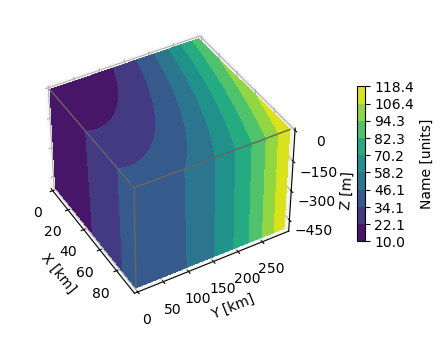

In [307]:
import matplotlib.pyplot as plt
import numpy as np

# Define dimensions
Nx, Ny, Nz = 100, 300, 500
X, Y, Z = np.meshgrid(np.arange(Nx), np.arange(Ny), -np.arange(Nz))

# Create fake data
data = (((X+100)**2 + (Y-20)**2 + 2*Z)/1000+1)

kw = {
    'vmin': data.min(),
    'vmax': data.max(),
    'levels': np.linspace(data.min(), data.max(), 10),
}

# Create a figure with 3D ax
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111, projection='3d')

# Plot contour surfaces
_ = ax.contourf(
    X[:, :, 0], Y[:, :, 0], data[:, :, 0],
    zdir='z', offset=0, **kw
)
_ = ax.contourf(
    X[0, :, :], data[0, :, :], Z[0, :, :],
    zdir='y', offset=0, **kw
)
C = ax.contourf(
    data[:, -1, :], Y[:, -1, :], Z[:, -1, :],
    zdir='x', offset=X.max(), **kw
)
# --


# Set limits of the plot from coord limits
xmin, xmax = X.min(), X.max()
ymin, ymax = Y.min(), Y.max()
zmin, zmax = Z.min(), Z.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# Plot edges
edges_kw = dict(color='0.4', linewidth=1, zorder=1e3)
ax.plot([xmax, xmax], [ymin, ymax], 0, **edges_kw)
ax.plot([xmin, xmax], [ymin, ymin], 0, **edges_kw)
ax.plot([xmax, xmax], [ymin, ymin], [zmin, zmax], **edges_kw)

# Set labels and zticks
ax.set(
    xlabel='X [km]',
    ylabel='Y [km]',
    zlabel='Z [m]',
    zticks=[0, -150, -300, -450],
)

# Set zoom and angle view
ax.view_init(40, -30, 0)
ax.set_box_aspect(None, zoom=0.9)

# Colorbar
fig.colorbar(C, ax=ax, fraction=0.02, pad=0.1, label='Name [units]')

# Show Figure
plt.show()

In [308]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
k = 8.99e9  # Coulomb's constant
q = 1e-9    # Charge magnitude (nanoCoulombs)
d = 0.5     # Separation between charges

# Create grid for field calculation
x, y, z = np.mgrid[-2:2:20j, -2:2:20j, -2:2:20j] 

# Positions of the charges
pos_charge = np.array([d/2, 0, 0])
neg_charge = np.array([-d/2, 0, 0])

# Electric field calculation at each grid point
def calc_E(pos, charge):
    r = np.subtract(pos, charge) 
    r_mag = np.linalg.norm(r, axis=1)  
    r_hat = r / r_mag[..., np.newaxis] 
    return k * charge * r_hat / r_mag[..., np.newaxis]**2 

Ex = calc_E(np.stack((x, y, z), axis=-1), q) + calc_E(np.stack((x, y, z), axis=-1), -q)
Ey = Ex[:, 1, :, :]
Ez = Ex[:, 2, :, :]

# 3D Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Streamlines to visualize the field
ax.streamplot(x, y, z, Ex, Ey, Ez, density=1.5, color='navy')

# Plot the charges
ax.scatter(pos_charge[0], pos_charge[1], pos_charge[2], color='red', s=80, label='Positive')
ax.scatter(neg_charge[0], neg_charge[1], neg_charge[2], color='blue', s=80, label='Negative')

# Aesthetics
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Electric Dipole Field')
ax.legend()

plt.show()


ValueError: operands could not be broadcast together with shapes (20,20,20,3) (20,20,3,1) 

In [309]:
# Constants
k = 8.99e9  # Coulomb's constant
q = 1e-9    # Charge magnitude (nanoCoulombs)
d = 0.5     # Separation between charges

# Create grid for field calculation
x, y, z = np.mgrid[-2:2:20j, -2:2:20j, -2:2:20j] 

# Positions of the charges
pos_charge = np.array([d/2, 0, 0])
neg_charge = np.array([-d/2, 0, 0])

# Electric field calculation at each grid point
def calc_E(pos, charge):
    r = np.subtract(pos, charge) 
    r_mag = np.linalg.norm(r, axis=1)  
    r_hat = r / r_mag[:, np.newaxis, np.newaxis, np.newaxis]   
    return k * charge * r_hat / r_mag[..., np.newaxis]**2 

Ex = calc_E(np.stack((x, y, z), axis=-1), q) + calc_E(np.stack((x, y, z), axis=-1), -q)
Ey = Ex[:, 1, :, :]
Ez = Ex[:, 2, :, :]

# 3D Plotting
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Streamlines to visualize the field
ax.streamplot(x, y, z, Ex, Ey, Ez, density=1.5, color='navy')

# Plot the charges
ax.scatter(pos_charge[0], pos_charge[1], pos_charge[2], color='red', s=80, label='Positive')
ax.scatter(neg_charge[0], neg_charge[1], neg_charge[2], color='blue', s=80, label='Negative')

# Aesthetics
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Electric Dipole Field')
ax.legend()

plt.show()


ValueError: operands could not be broadcast together with shapes (20,1,20,20,20,3) (20,20,3,1) 